In [99]:
#Python Libraries
import pandas as pd #Data Processing and CSV file I/o
import numpy as np #for numeric operations
import matplotlib.pyplot as plt
import seaborn as sns

#spliting and scaling the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

#metric
from sklearn.metrics import classification_report, accuracy_score

## Collecting Data

In [100]:
insurance_df = pd.read_csv('insurance.csv')

In [101]:
#changing categorical values into bianry
gender = {'male': 0,'female': 1}
smoker = {'yes':1, 'no':0}
loc ={'northwest': 0, 'southwest':1, 'southeast':2, 'northeast':3}
insurance_df['sex']= [gender[item] for item in insurance_df['sex']]
insurance_df['smoker'] = [smoker[item] for item in insurance_df['smoker']]
insurance_df['region']= [loc[item] for item in insurance_df['region']]

insurance_df.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
5,31,1,25.740,0,0,2,3756.62160
6,46,1,33.440,1,0,2,8240.58960
7,37,1,27.740,3,0,0,7281.50560
8,37,0,29.830,2,0,3,6406.41070
9,60,1,25.840,0,0,0,28923.13692


In [102]:
print(f"The Numbers of Rows and Columns in this data set are: \
{insurance_df.shape[0]} rows and {insurance_df.shape[1]} columns.")

The Numbers of Rows and Columns in this data set are: 1338 rows and 7 columns.


# Exploratory Data Analysis(EDA)

In [103]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [144]:
#statistics summary
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.494768,0.500160,0.0000,0.00000,0.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region,1338.0,1.513453,1.104915,0.0000,1.00000,2.000,2.000000,3.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [104]:
#creating correlation matrix
corr=insurance_df.corr()

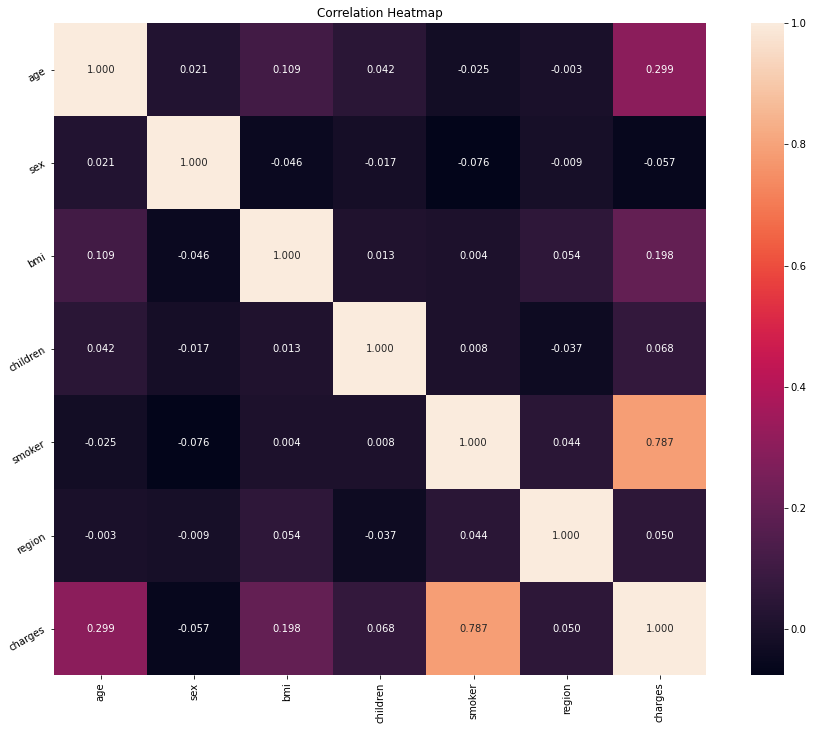

In [105]:
#plotting the correlation matrix
plt.figure(figsize=(16,12))
ax = sns.heatmap(corr, annot=True, square=True, fmt='.3f', linecolor='black')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
plt.title('Correlation Heatmap')
plt.show();

In [106]:
corr_matrix = insurance_df.corr()
corr_matrix['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
region      0.050226
sex        -0.057292
Name: charges, dtype: float64

_Here we see that charges for smokers are higher than non-smokers. Sex,children,region do not affect the price much_

In [107]:
#counting the missing values in numerical features
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Feature Scaling

In [108]:
# segregating the target variable
X = insurance_df.drop(columns='charges')
y = insurance_df['charges']
#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [125]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [126]:
print(f"In X_train dataset there are: {X_train.shape[0]} rows and {X_train.shape[1]} columns.")
print(f"In X_test dataset there are: {X_test.shape[0]} rows and {X_test.shape[1]} columns.")
print(f"The shape of y_train is: {y_train.shape}")
print(f"The shape of y_test is: {y_test.shape}")

In X_train dataset there are: 1070 rows and 6 columns.
In X_test dataset there are: 268 rows and 6 columns.
The shape of y_train is: (1070,)
The shape of y_test is: (268,)


In [127]:
models = [LinearRegression(),
          RandomForestRegressor(), AdaBoostRegressor(),
          Lasso(), Ridge()]
  
for i in range(5):
    models[i].fit(X_train, y_train)
  
    print(f'{models[i]} : ')
    pred_train = models[i].predict(X_train)
    print('Training Error : ', mape(y_train, pred_train))
  
    pred_test = models[i].predict(X_test)
    print('Validation Error : ', mape(y_test, pred_test))
    print()

LinearRegression() : 
Training Error :  0.4304192162954562
Validation Error :  0.3990653083147247

RandomForestRegressor() : 
Training Error :  0.1321941176162457
Validation Error :  0.34099511947225186

AdaBoostRegressor() : 
Training Error :  0.6083353820943579
Validation Error :  0.6238128092673

Lasso() : 
Training Error :  0.4304124672657053
Validation Error :  0.39913488443714595

Ridge() : 
Training Error :  0.4306522614915068
Validation Error :  0.39941244508340445



_RandomForestRegressor has the least error value_

In [166]:
# Instantiate and fit the RandomForestClassifier
regressor = RandomForestRegressor(n_estimators=20, random_state=42)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=42)

In [173]:
from sklearn.metrics import mean_squared_error
prediction = regressor.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print(mse)
print(rmse)

18388069.58658093
4288.131246426691


Text(0, 0.5, 'Predicted Y')

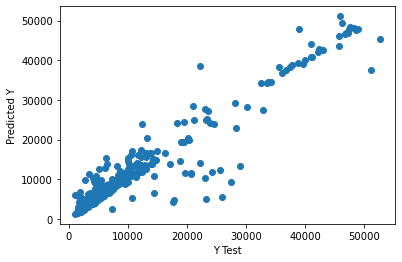

In [179]:
#Correlation between predicted and actual results.
plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [177]:
# Predict charges for new customer : Name- patientzero
data = {'age' : 40,
        'sex' : 1,
        'bmi' : 45.50,
        'children' : 4,
        'smoker' : 1,
        'region' : 3}
index = [1]
patientzero_df = pd.DataFrame(data,index)
patientzero_df

,age,sex,bmi,children,smoker,region
1,40,1,45.5,4,1,3


In [178]:
prediction_patientzero = regressor.predict(patientzero_df)
print("Medical Insurance cost for Frank is : ",prediction_patientzero)

Medical Insurance cost for Frank is :  [58252.2865695]
